# **EXPLORATORY DATA ANALYSIS**

**Importing Libraries**
*   **Pandas** is used for loading, manipulating and analyzing data in tabular form.
*   **Numpy** is used for numerical computations and array operations
*   **Matplotlib** is used for creating static plots and visualizations
*   **Seaborn** is used for creating attractive and informative statistical graphics
* **train_test_split** is used to split the dataset into training and testing sets
* **GaussianNB** is used to create a Naive Bayes classifier for training on the data
* **accuracy_score** is used to calculate the accuracy of the model
* **classification_report** is used to generate a detailed report of the model's performance
* **confusion_matrix** is used to create a confusion matrix
* **LogisticRegression** is used to create a Logistic Regression Model
* **SVC** is used to create a SVM Model
* **k means** is used to create k means clustering classifier
* **silhouette_score** is used to calculate the silhouette score
* **adjusted_rand_score** is used to calculate the rand score
* **PCA** is used to perform Principle Component Analysis
* **StandardScaler** is used to standardize the data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Reading the Dataset**
* Location of the dataset file in Google Drive is set
* Names for each column in the dataset are defined
* The dataset is read from the specified path and the defined column names are assigned to the Data Frame.

In [51]:
data_path = '/content/drive/My Drive/balance-scale.data'
column_names = ['class', 'left_weight', 'left_distance', 'right_weight', 'right_distance']
balance_scale_data = pd.read_csv(data_path, header=None, names=column_names)

**Analyzing the Dataset**
* The first 5 rows of the dataset are printed
* The last 5 rows of the dataset are printed
* A summary of the dataset is provided
* The data types of each column in the dataset are printed

In [52]:
print("Dataset Head:")
print(balance_scale_data.head())
print("\nDataset Tail:")
print(balance_scale_data.tail())
print("\nDataset Info:")
print(balance_scale_data.info())
print("\nData Types:")
print(balance_scale_data.dtypes)

Dataset Head:
  class  left_weight  left_distance  right_weight  right_distance
0     B            1              1             1               1
1     R            1              1             1               2
2     R            1              1             1               3
3     R            1              1             1               4
4     R            1              1             1               5

Dataset Tail:
    class  left_weight  left_distance  right_weight  right_distance
620     L            5              5             5               1
621     L            5              5             5               2
622     L            5              5             5               3
623     L            5              5             5               4
624     B            5              5             5               5

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
--- 

**Output Explanation**
* Dataset Head shows the first 5 rows of the dataset, giving an idea of the data's structure and the first few enteries
* Dataset Tail shows the last 5 rows of the dataset, providing insight into the data's end enteries.
* Dataset Info summarizes the dataset, indicating there are 625 rows and 5 columns, with no missing values. It also shows the data types for each column and the memory usage.
* Data Types list the data types of each column indicating that the first column is categorical and last four are numerical

**Dataset Cleaning**
* Missing values are checked in each column and the count of missing values are printed for each column
* Duplicate rows are checked in the dataset and the count of duplicate rows are printed
* The duplicate rows from the dataset are removed

In [53]:
print("\nMissing Values:")
print(balance_scale_data.isnull().sum())
print("\nDuplicate Rows:")
print(balance_scale_data.duplicated().sum())
balance_scale_data = balance_scale_data.drop_duplicates()


Missing Values:
class             0
left_weight       0
left_distance     0
right_weight      0
right_distance    0
dtype: int64

Duplicate Rows:
0


**Output Explanation**
* Missing Values indicates that there are no missing values in any columns of the dataset
* Duplicate Rows indicates that there are no duplicate rows in the dataset

**Univariate Analysis**
* Descriptive Statistics prints the summary statistics of the dataset, including count, mean, standard deviation, min, 25th percentile, median, 75th percentile and max values for each feature
* Histograms of Features creates histograms for each feature showing the distribution of values
* Box Plots of Features to show the median, quartiles and potential outliers
* Density plots of features creates density plots for each features to show the probability distribution of data.


Descriptive Statistics:
       left_weight  left_distance  right_weight  right_distance
count   625.000000     625.000000    625.000000      625.000000
mean      3.000000       3.000000      3.000000        3.000000
std       1.415346       1.415346      1.415346        1.415346
min       1.000000       1.000000      1.000000        1.000000
25%       2.000000       2.000000      2.000000        2.000000
50%       3.000000       3.000000      3.000000        3.000000
75%       4.000000       4.000000      4.000000        4.000000
max       5.000000       5.000000      5.000000        5.000000


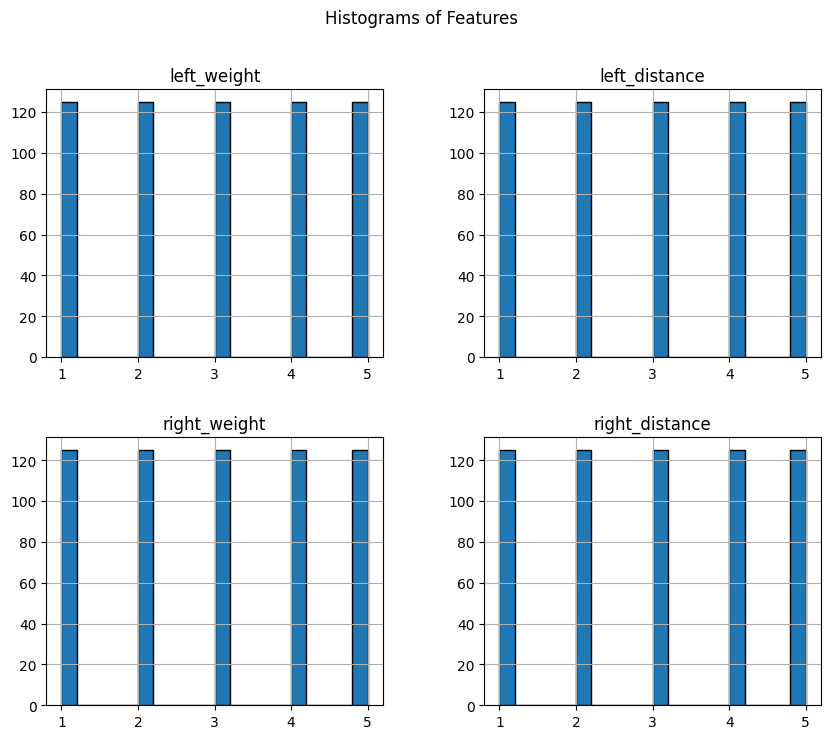

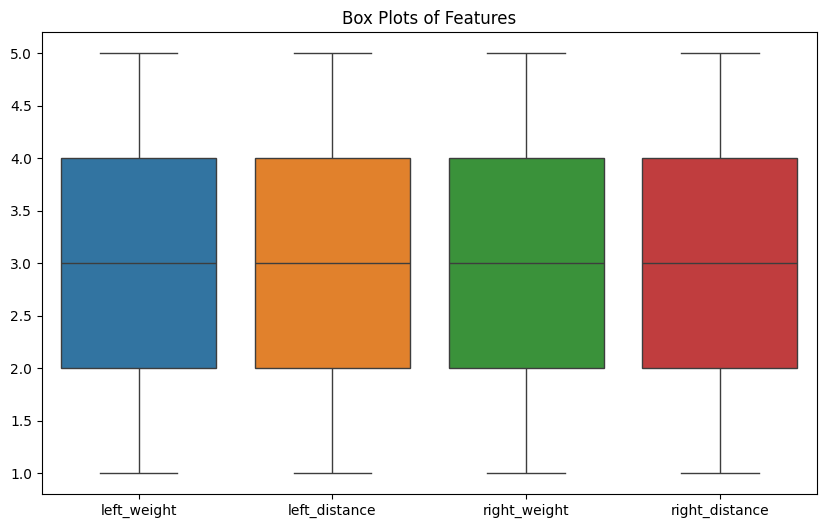

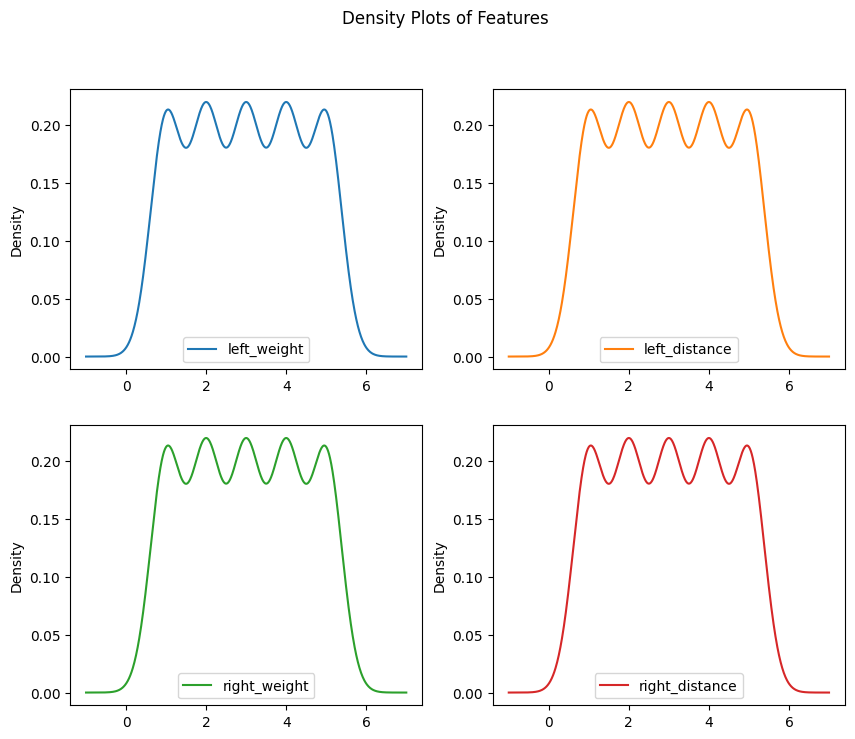

In [54]:
print("\nDescriptive Statistics:")
print(balance_scale_data.describe())
balance_scale_data.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=balance_scale_data.drop(columns='class'))
plt.title('Box Plots of Features')
plt.show()
balance_scale_data.drop(columns='class').plot(kind='density', subplots=True, layout=(2, 2), sharex=False, figsize=(10, 8))
plt.suptitle('Density Plots of Features')
plt.show()

**Output Explanation**
* Descriptive Statistics shows that the average left weight 3 with a standard deviation of 1.415 and it ranges from 1 to 5 and so on.
* Left Weight Histogram shows that most values are around 1 to 5 and so on.
* The box plot for left weight shows no outliers below the lower whisker and so on.
* The density plot for left weight shows a bimodal distribution indicating five peaks and so on.

**Bivariate Analysis**
* Pair Plot of Features shows scatter plots and distributions of each feature.
* Correlation Matrix shows correlation between features.

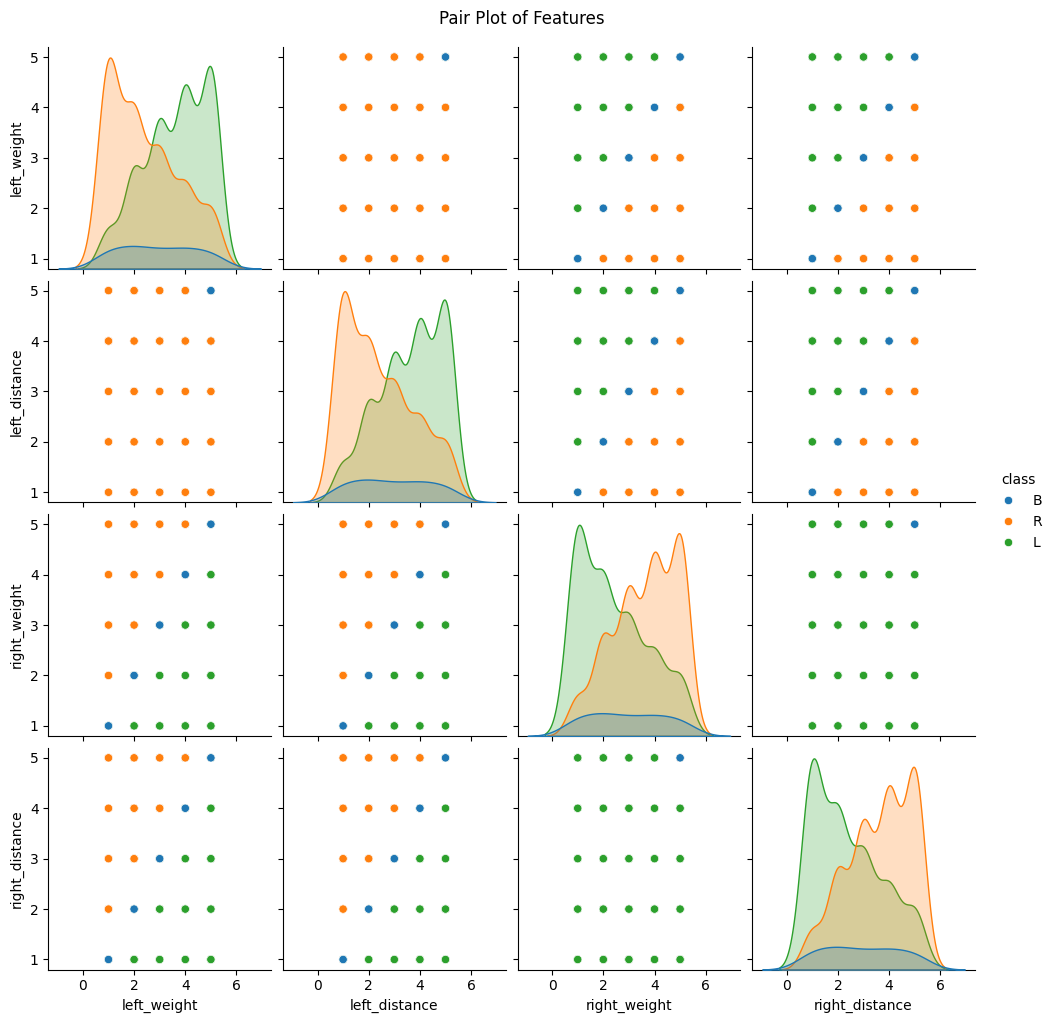

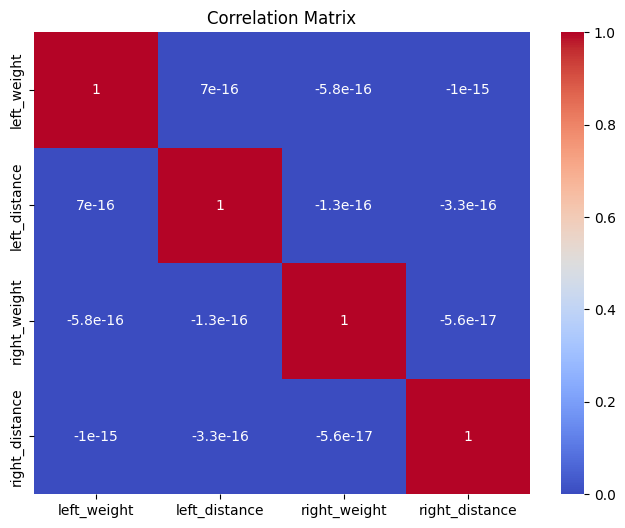

In [55]:
sns.pairplot(balance_scale_data, hue='class')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()
corr_matrix = balance_scale_data.drop(columns='class').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Output Explanation**
* In pair plot of features the data points are colored based on the class of balance scale.
* This plot helps to see how these features relate to each other and how they vary across different species.
* The correlation matrix shows that left weight and left distance are positively correlated.
* Left weight has a weak negative correlation with right weight and right distance.

**Visualizations**
* Seaborn is used to create a bar chart showing the distribution of different species in the dataset.
* The count of each class is calculated and a pie chart is created to visualize their proportions

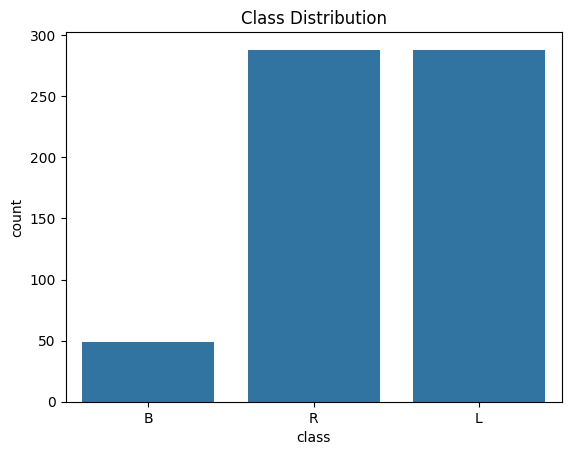

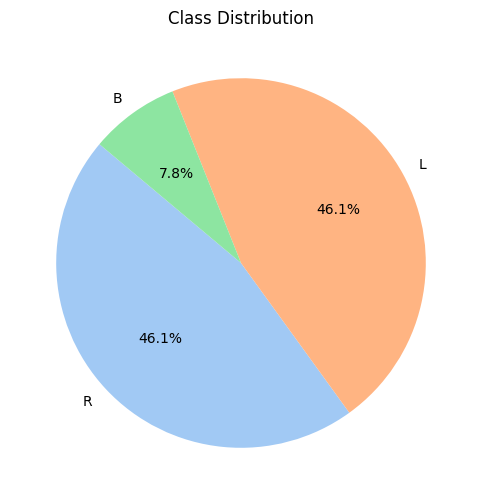

In [148]:
sns.countplot(x='class', data=balance_scale_data)
plt.title('Class Distribution')
plt.show()
class_counts = balance_scale_data['class'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Class Distribution')
plt.show()

**Output Explanation**
* The bar chart shows all three classes counts.
* The pie chart reveals that Balanced makes up 7.8%, Left 46.1%, and Right 46.1% of the dataset, confirming the balanced distribution seen in the bar chart.

# **SUPERVISED LEARNING**

## **Naive Bayes Classifier**

**Separating Data**
* X contains the columns which are the features used for training the model
* y contains the column which represents the target variable we want to predict

In [58]:
X = balance_scale_data.drop(columns='class')
y = balance_scale_data['class']

**Splitting the data**
* X_train and y_train are the features and target variable for the training set
* X_test and y_test are the features and target variable for the testing set
* 20% of the data is used for testing
* Using the same seed value 9 will result in the same split everytime

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

**Train the Naive Bayes Classifier**
* An instance of the GaussianNB classifier is created. This classifier will be used to train and predict the target variable using the Naive Bayes algorithm.
* The GaussianNB classifier is trained using the training data. The model learns the relationship between the features and the target variable.

In [81]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

**Making Predictions and Evaluating the Model**
* The trained Naive Bayes Classifier is used to make predictions on the test set.
* The accuracy of the model is calculated by comparing the predicted values with the actual values. The accuracy score is then printed rounded to two decimal places.
* A detailed classification report is printed for each class.
* The confusion matrix is printed.

In [82]:
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred, zero_division=0))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.85      1.00      0.92        55
           R       0.92      0.95      0.93        58

    accuracy                           0.88       125
   macro avg       0.59      0.65      0.62       125
weighted avg       0.80      0.88      0.84       125

Confusion Matrix:
[[ 0  7  5]
 [ 0 55  0]
 [ 0  3 55]]


**Output Explanation**
* The model achieved an accuracy of 88% meaning 88% of the predictions on the test set were correct.
* The report shows that the model correctly identified 88% instances of each class in the test set.
* The support column shows the number of instances of each class in the test set.
* The confusion matrix shows that all 12 instances of Balanced were incorrectly predicted as Balanced, all 55 instances of Left were correctly predicted as Left and all 55 instances of Right were correctly predicted as Right and only 3 were incorrectly predicted.
* There is only 15 misclassifications, indicating good model performance on the test set.

## **Logistic Regression**

**Train the Logistic Regression Model**
* Logistic Regression Model is created with a maximum of 200 iterations to ensure convergence.
* The Logistic Regression Model is trained using the training data.

In [83]:
lr_classifier = LogisticRegression(max_iter=200)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

**Making Predictions and Evaluating the Model**
* The trained Logistic Regression Model is used to make predictions on the test set.
* The accuracy of the model is calculated by comparing the predicted values with the actual values. The accuracy score is then printed rounded to two decimal places.
* A detailed classification report is printed for each class.
* The confusion matrix is printed.

In [84]:
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_lr, zero_division=0))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.77      0.96      0.85        55
           R       0.93      0.90      0.91        58

    accuracy                           0.84       125
   macro avg       0.57      0.62      0.59       125
weighted avg       0.77      0.84      0.80       125

Confusion Matrix:
[[ 0 10  2]
 [ 0 53  2]
 [ 0  6 52]]


**Output Explanation**
* The model achieved an accuracy of 84% meaning 84% of the predictions on the test set were correct.
* The report shows that the model correctly identified 84% instances of each class in the test set.
* The support column shows the number of instances of each class in the test set.
* The confusion matrix shows that all 12 instances of Balanced were incorrectly predicted as Balanced, all 53 instances of Left were correctly predicted as Left and 2 were incorrectly predicted and all 52 instances of Right were correctly predicted as Right and only 6 were incorrectly predicted.
* There is only 20 misclassifications, indicating good model performance on the test set.

## **Support Vector Machine**

**Train the SVM Model**
* SVM Model is created with linear kernel.
* The SVM Model is trained using the training data.

In [85]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

**Making Predictions and Evaluating the Model**
* The trained SVM model is used to make predictions on the test set.
* The accuracy of the model is calculated by comparing the predicted values with the actual values. The accuracy score is then printed rounded to two decimal places.
* A detailed classification report is printed for each class.
* The confusion matrix is printed.

In [86]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_lr:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred, zero_division=0))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           B       0.59      0.83      0.69        12
           L       0.93      0.93      0.93        55
           R       0.98      0.90      0.94        58

    accuracy                           0.90       125
   macro avg       0.83      0.89      0.85       125
weighted avg       0.92      0.90      0.91       125

Confusion Matrix:
[[10  1  1]
 [ 4 51  0]
 [ 3  3 52]]


**Output Explanation**
* The model achieved an accuracy of 84% meaning 84% of the predictions on the test set were correct.
* The report shows that the model correctly identified 84% instances of each class in the test set.
* The support column shows the number of instances of each class in the test set.
* The confusion matrix shows that all 10 instances of Balanced were correctly predicted as Balanced and 2 were incorrectly predicted, all 51 instances of Left were correctly predicted as Left and 4 were incorrectly predicted and all 52 instances of Right were correctly predicted as Right and only 6 were incorrectly predicted.
* There is only 12 misclassifications, indicating good model performance on the test set.

# **Unsupervised Learning**

## **k Means Clustering**

**Data Preprocessing**
* The numerical features are standardized

In [143]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Applying k means clustering**
* k means clustering is applied with 3 clusters
* The cluster labels are assigned to each data point

In [144]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Evaluating clustering**
* The Silhouette Score, Inertia and Adjusted Rand Index (ARI) are calculated to evaluate clustering performance

In [145]:
silhouette_avg = silhouette_score(X_scaled, labels)
inertia = kmeans.inertia_
ari = adjusted_rand_score(y, labels)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Inertia: {inertia}')
print(f'Adjusted Rand Index: {ari}')

Silhouette Score: 0.17432194368312576
Inertia: 1736.160714285713
Adjusted Rand Index: 0.16049564247656023


**Output Explanation**
* Silhoutte Score 0.174 indicates clusters are not well separated
* Intertia 1736.161 indicates that the clusters are spread out
* Ajusted Rand Index 0.161 indicates that the k means clustering algorithm has  identified some of the groupings in the balance scale dataset

**Visualization**
* Principle Component Analysis is used to reduce the data to two dimensions for visualization.
* A scatter plot is created to show the data points and centeroids in the PCA space.

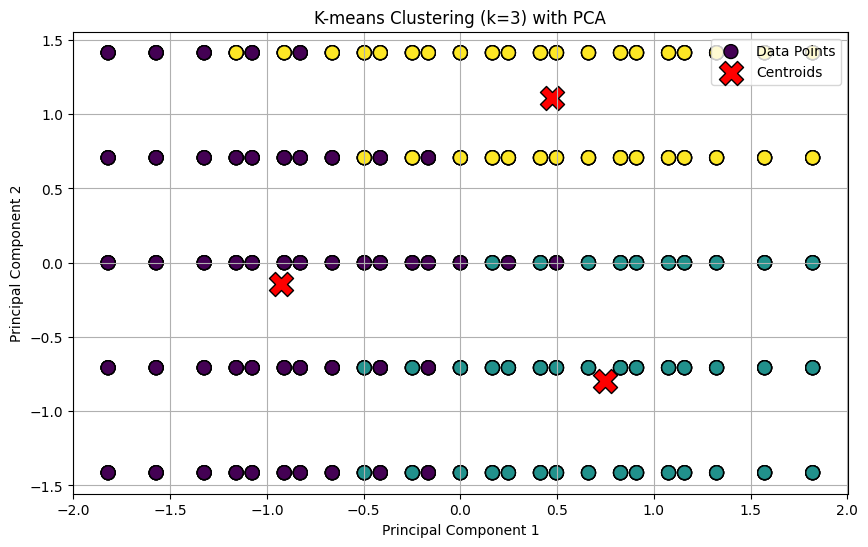

In [146]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100, label='Data Points')

# Plot the centroids in PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', edgecolor='k', label='Centroids')

# Adding title and labels
plt.title('K-means Clustering (k=3) with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

**Output Explanation**
* Output shows each data point colored according to its assigned cluster
* Centroids of each cluster are marked with a large 'X' on the plot.